<div style="text-align: center; font-size: 24px; font-weight: bold; color: #FFFFFF; margin-top: 20px; margin-bottom: 20px;">
    EJERCICIO 2.<br>
    <span style="font-size: 20px; color: #B0B0B0;">Regresión Lineal Multiple</span><br><br>
    Crea un modelo de <span style="font-weight: bold; color: #1E90FF;">regresión lineal multiple </span> utiliza un conjunto de datos con múltiples variables independientes para crear un modelo de regresión lineal múltiple.<br><br>
    <span style="font-size: 18px; color: #B0B0B0;">Utilizar las diferentes estrategias para la selección de variables</span>
</div>

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install numpy
%pip install scikit-learn

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")
auto_mpg = auto_mpg.dropna() 
auto_mpg = auto_mpg.drop(columns=["cylinders", "model_year", "origin", "car_name"])
print(auto_mpg.head()) 

C:\Users\gonza\AppData\Local\Temp\ipykernel_14356\1919900989.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")


    mpg  displacement  horsepower  weight  acceleration
0  18.0         307.0       130.0  3504.0          12.0
1  15.0         350.0       165.0  3693.0          11.5
2  18.0         318.0       150.0  3436.0          11.0
3  16.0         304.0       150.0  3433.0          12.0
4  17.0         302.0       140.0  3449.0          10.5


In [2]:
import statsmodels.api as sm

# Agarra todas las variables del dataset excepto el mpg que es la variable
# objetivo (y), y le agrega una constante
X = auto_mpg.drop(columns=["mpg"])
X = sm.add_constant(X)
y = auto_mpg["mpg"].values

x_train = X[:int(len(auto_mpg)*0.8)]
y_train = y[:int(len(auto_mpg)*0.8)]

x_test = X[:int(len(auto_mpg)*0.8)]
y_test = y[:int(len(auto_mpg)*0.8)]


model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.73e-95
Time:                        03:26:30   Log-Likelihood:                -813.59
No. Observations:                 313   AIC:                             1637.
Df Residuals:                     308   BIC:                             1656.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.5072      2.162     20.127   

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def r2_variation(vars_size, r2_adj, title, x_label, y_label):
    """
    Plot the scatter and the curve that shows how R2 value vary over
    every iteration. A title and labels for the graph must be included.
    Also, highlight the point where there is a maximum R2 value. Add information
    about that point. The amount of independent variables is given.
    """
    # Grafiquemos la solucion
    # Los valores para señalar cada iteracion
    x = np.arange(vars_size)
    # El punto donde R2 es maximo
    r2_max_x = r2_adj.index(max(r2_adj))
    r2_max_y = max(r2_adj)
    # Titulo de nuestro grafico y nombre de los ejes
    plt.title(title, loc = 'left')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Grafiquemos la recta con la variacion del R2 en cada vuelta
    plt.plot(x, r2_adj)
    # Grafiquemos dispersion de puntos de X vs R2 ajustado
    plt.scatter(x, r2_adj)
    # Grafiquemos el punto donde R2 es maximo
    plt.scatter(r2_max_x, r2_max_y, marker='*', s=100, color='red')
    plt.show()

FSS

In [4]:
import operator
import r2_variation

# Setear las condiciones iniciales
variables = ['const']  # Iniciamos con solo la constante
iterate_columns = X.columns.drop('const', 1)  # Variables que iteraremos
r2_adj = []  # Lista para guardar los valores de R2 ajustado
vars_size = iterate_columns.size  # Cantidad de variables independientes
var_model = {}  # Diccionario para almacenar el mejor modelo en cada iteración

# Iteramos k veces, siendo k la cantidad de variables
for k in range(0, vars_size):
    print("Esta es la ronda k=" + str(k))
    r2 = {}  # Diccionario para almacenar los R2 ajustados de cada modelo en la ronda
    
    # Iteramos sobre todas las variables disponibles esa ronda
    for var in iterate_columns:
        print("Ahora estoy probando con la var: " + var)
        var_explicativa = X[variables + [var]]  # Incluimos las variables seleccionadas + la nueva
        model = sm.OLS(y, var_explicativa)  # Creamos el modelo
        regr = model.fit()  # Ajustamos el modelo
        r2[var] = regr.rsquared_adj  # Guardamos el R2 ajustado de este modelo
        print("Aca estoy guardando los R2")
        print(r2)
    
    print("--------")
    # Seleccionamos la variable con el mayor R2 ajustado
    var_max_r2 = max(r2.items(), key=operator.itemgetter(1))[0]
    print("MAX R2: " + var_max_r2)
    
    # Almacenamos las variables que describen al modelo
    var_model[k] = var_max_r2
    
    # Almacenamos el valor de R2 ajustado
    r2_adj.append(r2[var_max_r2])
    print("R2 adj hasta ahora " + str(r2_adj))
    
    # Quitamos la variable seleccionada de la lista de variables disponibles
    iterate_columns = iterate_columns.drop(var_max_r2, 1)
    variables.append(var_max_r2)

# Identificar el índice con el R2 ajustado más alto
r2_max_index = r2_adj.index(max(r2_adj))
print("El mejor modelo fue en la ronda: " + str(r2_max_index))
print("Las variables seleccionadas fueron: " + str(variables))

Esta es la ronda k=0
Ahora estoy probando con la var: displacement
Aca estoy guardando los R2
{'displacement': 0.6473274244226872}
Ahora estoy probando con la var: horsepower
Aca estoy guardando los R2
{'displacement': 0.6473274244226872, 'horsepower': 0.6049378688071001}
Ahora estoy probando con la var: weight
Aca estoy guardando los R2
{'displacement': 0.6473274244226872, 'horsepower': 0.6049378688071001, 'weight': 0.691842306026063}
Ahora estoy probando con la var: acceleration
Aca estoy guardando los R2
{'displacement': 0.6473274244226872, 'horsepower': 0.6049378688071001, 'weight': 0.691842306026063, 'acceleration': 0.17710245284896298}
--------
MAX R2: weight
R2 adj hasta ahora [0.691842306026063]
Esta es la ronda k=1
Ahora estoy probando con la var: displacement
Aca estoy guardando los R2
{'displacement': 0.6974190581758475}
Ahora estoy probando con la var: horsepower
Aca estoy guardando los R2
{'displacement': 0.6974190581758475, 'horsepower': 0.7048656350343583}
Ahora estoy pr

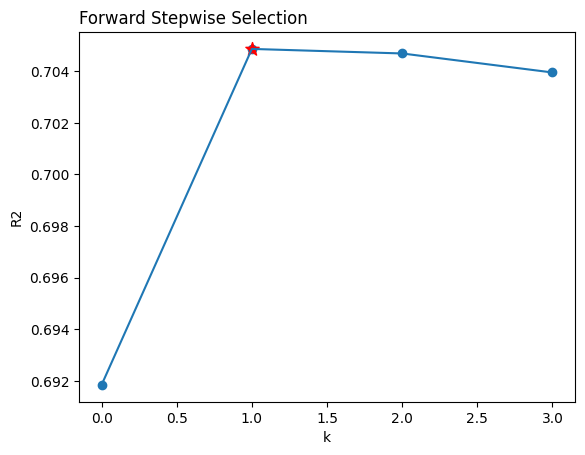

In [7]:
r2_variation(vars_size, r2_adj, "Forward Stepwise Selection", "k", "R2")

BSS

In [8]:
# Seteamos las condiciones iniciales necesarias
variables = X.columns
iterate_columns = variables.drop('const', 1)
vars_size = iterate_columns.size
r2_adj = []
var_model = {}
# Iteramos k veces, siendo k la cantidad de variables
for k in range(0, vars_size):
    # Acumulamos los valores de R2 para cada variable en los modelos que armaremos
    r2 = {}
    # Indice para insertar las variables temporalmente removidas en su lugar
    i = 1
    # Iteramos sobre todas las variables disponibles para la ronda
    for var in iterate_columns:
        #Eliminamos la variable para probar
        variables = variables.drop(var, 1)
        # Fijamos que variables seran las que definiran nuestro modelo
        var_explicativa = X[variables]
        # Insertamos nuevamente la variable que sacamos en el lugar que estaba para la prox ronda
        variables = variables.insert(i, var)
        # Entrenamos el modelo
        model = sm.OLS(y, var_explicativa)
        regr = model.fit()
        # Almacenamos el R2 para cada set de variables que se prueba
        r2[var] = regr.rsquared_adj
        # Actualizador de indice
        i += 1
    # Seleccionamos aquella con mayor R2
    var_max_r2 = max(r2.items(), key=operator.itemgetter(1))[0]
    # Almacenamos el valor de R2
    r2_adj.append(r2[var_max_r2])
    # Almacenamos las variables que describen a ese modelo
    var_model[k] = var_max_r2
    # No itera mas sobre esa variable tampoco
    iterate_columns = iterate_columns.drop(var_max_r2, 1)
    # Dejamos de considerar como una variable posible para definir al modelo
    variables = variables.drop(var_max_r2, 1)
#Seteamos el valor de la ronda k donde R2 es maximo
r2_max = r2_adj.index(max(r2_adj))

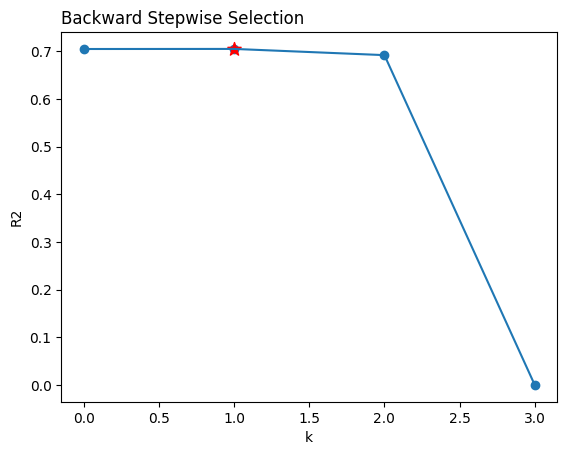

In [9]:
r2_variation(vars_size, r2_adj, 'Backward Stepwise Selection', 'k', 'R2')